# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [36]:
# data combined into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Dataframe display
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# number of mice
mouse_df['Mouse ID'].nunique()

249

In [38]:
# duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [39]:
# duplicate mouse ID
duplicate_mouse = duplicate_mouse_ids[0]
duplicate_mouse

'g989'

In [60]:
# data for duplicate mouse ID
duplicate_rows = mouse_df.loc[mouse_df['Mouse ID'] == duplicate_mouse, :]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Clean DataFrame by dropping the duplicate mouse by its ID
mouse_cleaned_df = mouse_df[mouse_df['Mouse ID'] != duplicate_mouse_ids[0]]
mouse_cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# number of mice in the clean DataFrame
mouse_cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [64]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Used groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assembled the resulting series into a single summary DataFrame.
mouse_groups = mouse_cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

standard_errors = mouse_groups.apply(lambda x: sem(x))

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mouse_groups.mean(),
    'Median Tumor Volume': mouse_groups.median(),
    'Tumor Volume Variance': mouse_groups.var(),
    'Tumor Volume Std Dev': mouse_groups.std(),
    'Tumor Volume Std. Err.': standard_errors
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# used more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Used the aggregation method to produce the same summary statistics in a single line
summary_stats = mouse_cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', np.mean),
    ('Median', np.median),
    ('Variance', np.var),
    ('Std Dev', np.std),
    ('SEM', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))])  # SEM calculation
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [66]:
# group by Drug Regimen and count
grouped_by_drug = mouse_cleaned_df.groupby('Drug Regimen').size()

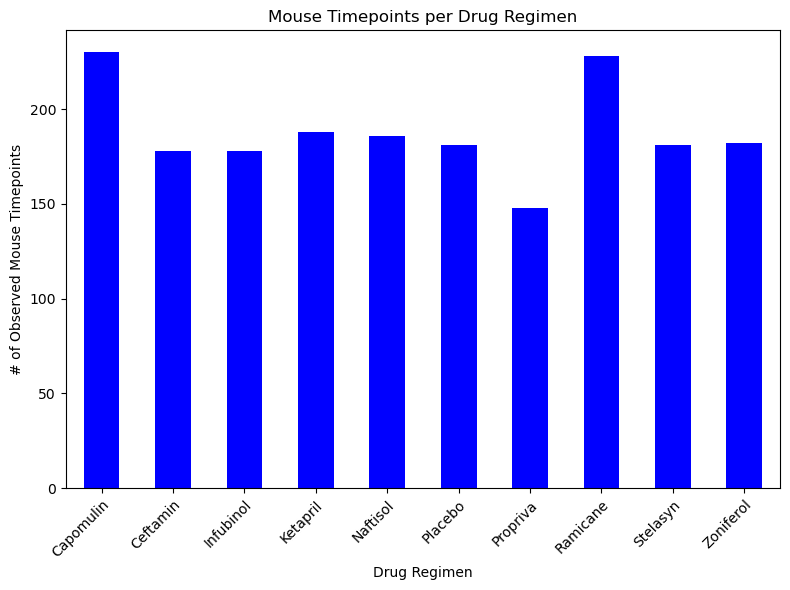

In [67]:
# bar plot shows the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Configure plot, figsize, title, and axis labels
figure1 = grouped_by_drug.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Mouse Timepoints per Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

# Configure x-tick rotation
xticklabels = grouped_by_drug.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Resize plot to display labels
plt.tight_layout()
plt.show()

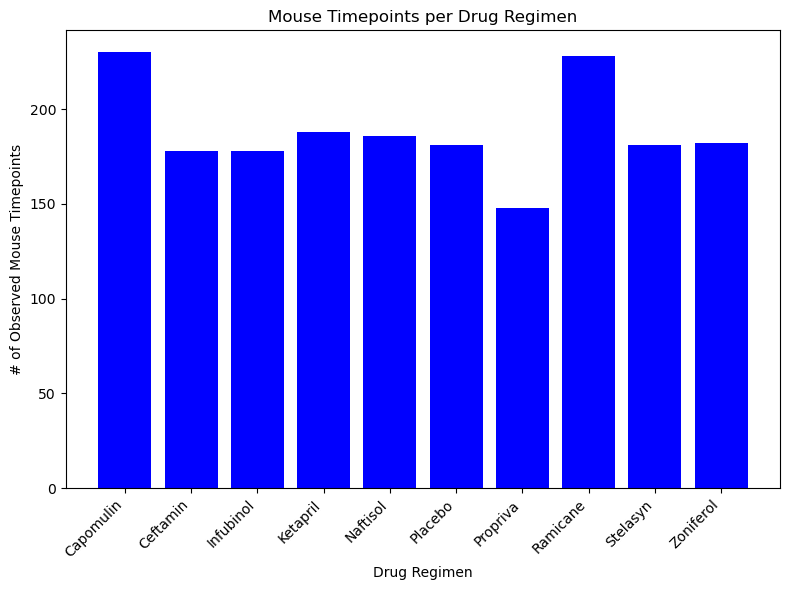

In [47]:
# Plot with Matplotlib.pyplot
plt.figure(figsize=(8, 6))  # Set figure size
plt.bar(grouped_by_drug.index, grouped_by_drug.values, color='blue')  # Create bar plot

plt.title('Mouse Timepoints per Drug Regimen')  # Set title
plt.xlabel('Drug Regimen')  # Set x-axis label
plt.ylabel('# of Observed Mouse Timepoints')  # Set y-axis label

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

In [76]:
# Count the number of each sex for pie charts
sex_counts = mouse_cleaned_df['Sex'].value_counts()

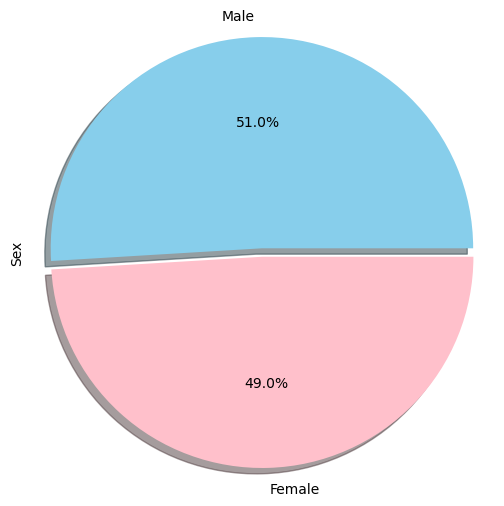

In [77]:
# Pie chart plot using pandas
plot = sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(6, 6), 
                colors=['skyblue', 'pink'], explode=(0.04, 0), shadow=True)

plt.ylabel('Sex')
plt.axis('equal')

plt.show()

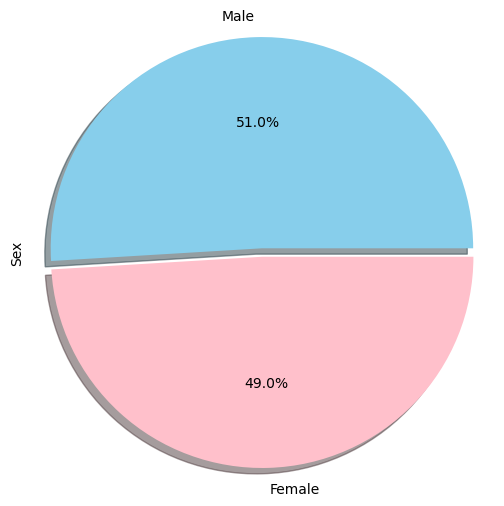

In [78]:
# Pie chart plot using pyplot
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=0, colors=['skyblue', 'pink'], explode=(0.04, 0), shadow=True)

plt.ylabel('Sex')  # Set y-label
plt.axis('equal')  # Set axis to 'equal' for a circular pie chart

plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculation: final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# List of treatment regimens to consider
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# The last (greatest) timepoint for each mouse
last_timepoints = mouse_cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, mouse_cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for specific treatment regimens
final_tumor_volumes = merged_data[merged_data['Drug Regimen'].isin(regimens)]
final_tumor_volumes = final_tumor_volumes[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

final_tumor_volumes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
3,a275,45,62.999356,Ceftamin
6,a411,45,38.407618,Ramicane
7,a444,45,43.047543,Ramicane


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = list(set(final_tumor_volumes['Drug Regimen']))

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_data = []
outliers_per_regimen = {}

In [53]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimens:
    # Filter dataframe for the current regimen
    regimen_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]
    
    # Calculate quartiles, IQR, and identify outliers
    quartiles = regimen_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Find outliers (values outside the lower and upper bounds)
    outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Store outliers in dictionary with regimen as key
    outliers_per_regimen[regimen] = outliers
    
# Print or further process outliers_per_regimen dictionary
for regimen, outliers in outliers_per_regimen.items():
    if not outliers.empty:
        print(f"Outliers for {regimen}:")
        print(outliers)
    else:
        print(f"No outliers found for {regimen}")

No outliers found for Ramicane
No outliers found for Capomulin
Outliers for Infubinol:
   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
31     c326          5           36.321346    Infubinol
No outliers found for Ceftamin


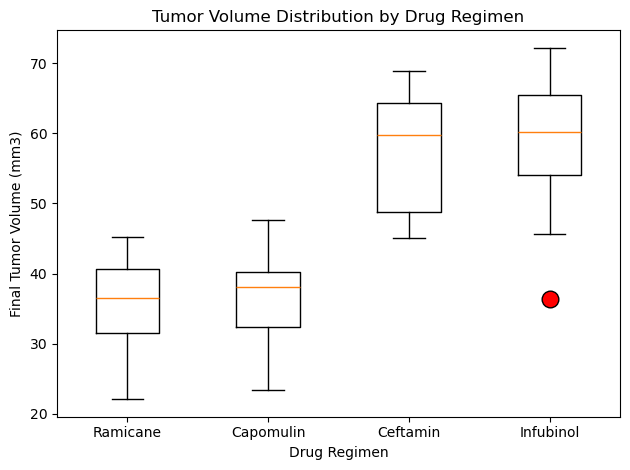

In [54]:
# Box plot that shows the distrubution of the tumor volume for each treatment group.

# group data by regimen
regimens_grouped = final_tumor_volumes.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean tumor volume for each regimen
mean_values = regimens_grouped.mean()

# Sort regimens by mean values (ascending order)
sorted_regimens = mean_values.sort_values().index

# Initialize figure and axis
fig, ax = plt.subplots()

# Create box plots for each regimen, sorted by mean
ax.boxplot([regimens_grouped.get_group(regimen) for regimen in sorted_regimens], labels=list(sorted_regimens),
           flierprops=dict(marker='o', markerfacecolor='r', markersize=12))

# Set labels and title
ax.set_title('Tumor Volume Distribution by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [55]:
# variables: mouse id & drug regimen
mouse_id = 'l509'
regimen = 'Capomulin'

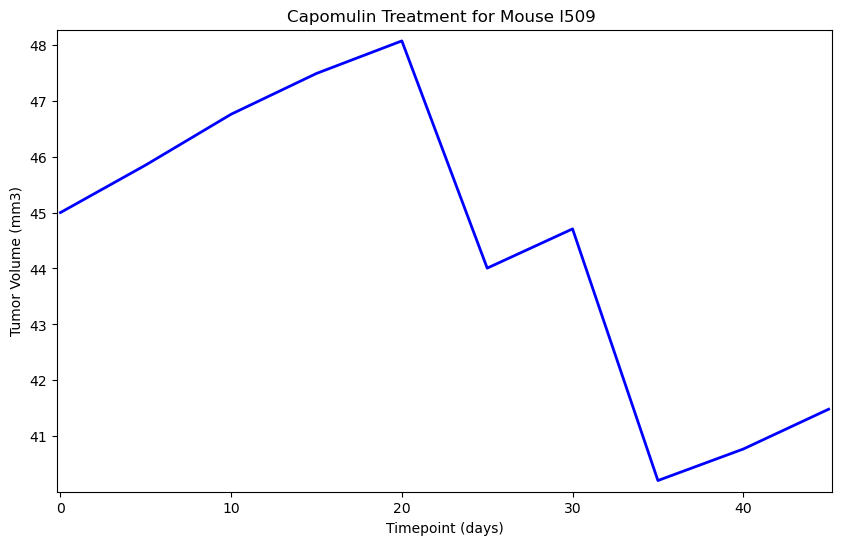

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for mouse l509 treated with Capomulin
mouse_data = mouse_cleaned_df[(mouse_cleaned_df['Mouse ID'] == mouse_id) & (mouse_cleaned_df['Drug Regimen'] == regimen)]

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-', linewidth=2, markersize=8)

# Adding labels and title
plt.title(f"{regimen} Treatment for Mouse {mouse_id} ")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Adjusting x-axis and y-axis limits and ticks
plt.xlim(min(mouse_data['Timepoint']) - 0.2, max(mouse_data['Timepoint']) + 0.2)  # Extend 0.2 units before and after the data
plt.ylim(min(mouse_data['Tumor Volume (mm3)']) - 0.2, max(mouse_data['Tumor Volume (mm3)']) + 0.2)  # Extend 0.2 units below and above the data

plt.show()

In [57]:
# filter data to drug capomulin regimen
capomulin_filtered = mouse_cleaned_df[(mouse_cleaned_df['Drug Regimen'] == regimen)]

# Calculate average tumor volume per mouse ID and add as a new column to dataframe
capomulin_filtered['Average Tumor Volume'] = capomulin_filtered.groupby('Mouse ID')['Tumor Volume (mm3)'].transform('mean')

# Drop duplicate rows to keep only unique mice with their average tumor volume
capomulin_filtered = capomulin_filtered.drop_duplicates(subset=['Mouse ID'])

C:\Users\jenni\AppData\Local\Temp\ipykernel_14464\2563117376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin_filtered['Average Tumor Volume'] = capomulin_filtered.groupby('Mouse ID')['Tumor Volume (mm3)'].transform('mean')


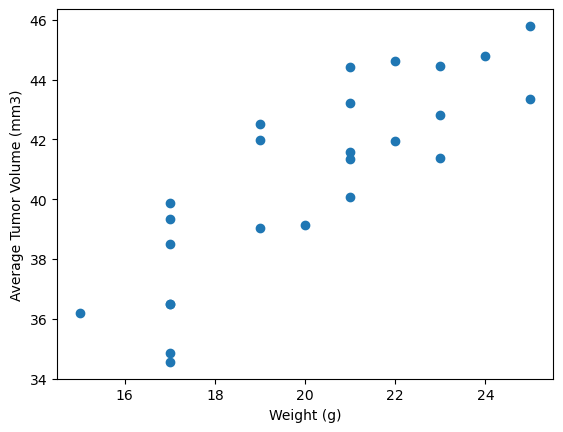

In [58]:
# Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# indep and dependent vars to graph
weights = capomulin_filtered['Weight (g)']
tumor_vols = capomulin_filtered['Average Tumor Volume']

plt.scatter(weights, tumor_vols)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

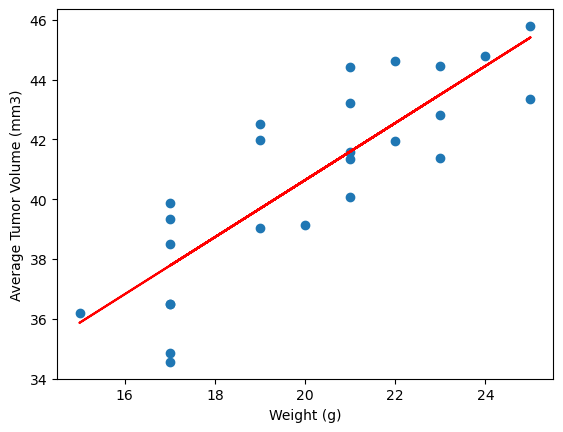

In [59]:
# Calculated the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Linear regression on weight vs average tumor volume
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(weights, tumor_vols)

# Equation of line: y = mx + b
m_fit = m_slope * weights + m_int

# plot scatterplot and line
plt.scatter(weights, tumor_vols)
plt.plot(weights,m_fit, color='red',linestyle="-")

plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()